In [1]:
import csv
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

2023-02-25 21:43:50.785944: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = 'model/keypoint.csv'
model_save_path = 'model/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier.tflite'

In [3]:
NUM_CLASSES = 24

In [4]:
x_data = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_data = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.75, random_state=42)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 1024)              44032     
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 24)                264       
                                                                 
Total params: 176,786
Trainable params: 176,786
Non-trai

2023-02-25 21:43:56.868815: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [8]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
32/37 [========================>.....] - ETA: 0s - loss: 2.8330 - accuracy: 0.1616
Epoch 1: saving model to model/keypoint_classifier.hdf5
37/37 [==============================] - 1s 12ms/step - loss: 2.7905 - accuracy: 0.1749 - val_loss: 2.3430 - val_accuracy: 0.3077
Epoch 2/1000
25/37 [===================>..........] - ETA: 0s - loss: 2.2450 - accuracy: 0.3316
Epoch 2: saving model to model/keypoint_classifier.hdf5
37/37 [==============================] - 0s 6ms/step - loss: 2.1818 - accuracy: 0.3473 - val_loss: 1.7247 - val_accuracy: 0.5016
Epoch 3/1000
33/37 [=========================>....] - ETA: 0s - loss: 1.7262 - accuracy: 0.4616
Epoch 3: saving model to model/keypoint_classifier.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 1.7206 - accuracy: 0.4634 - val_loss: 1.3148 - val_accuracy: 0.5880
Epoch 4/1000
30/37 [=======================>......] - ETA: 0s - loss: 1.4468 - accuracy: 0.5547
Epoch 4: saving model to model/keypoint_classifier.hdf5
37/3

In [10]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9682


In [11]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 84ms/step
[7.1342561e-15 4.1568804e-17 7.4071622e-17 5.3020029e-11 8.6447693e-09
 2.6310101e-24 1.8512062e-04 1.8759287e-08 1.4747102e-15 7.8030884e-14
 1.0007609e-11 5.4866935e-14 3.1466929e-08 1.9592359e-13 4.8742371e-10
 9.9981254e-01 5.1041952e-20 4.0979832e-23 1.0465224e-11 3.8420842e-12
 2.2642052e-06 4.9304458e-27 4.0286125e-12 5.6757515e-20]
15


50/50 [==============================] - 0s 925us/step


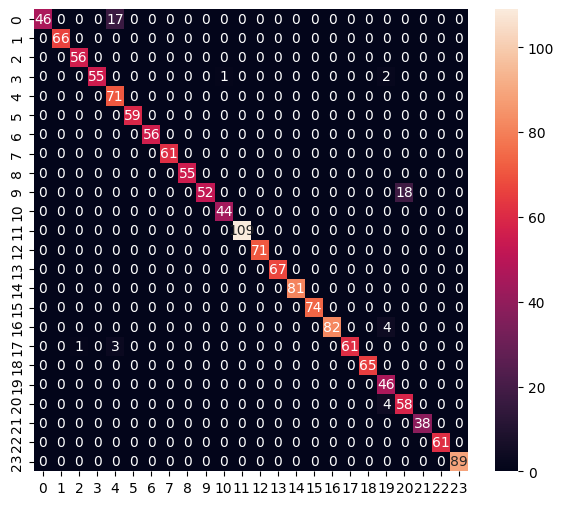

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        63
           1       1.00      1.00      1.00        66
           2       0.98      1.00      0.99        56
           3       1.00      0.95      0.97        58
           4       0.78      1.00      0.88        71
           5       1.00      1.00      1.00        59
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        61
           8       1.00      1.00      1.00        55
           9       1.00      0.74      0.85        70
          10       0.98      1.00      0.99        44
          11       1.00      1.00      1.00       109
          12       1.00      1.00      1.00        71
          13       1.00      1.00      1.00        67
          14       1.00      1.00      1.00        81
          15       1.00      1.00      1.00        74
          16       1.00      0.95      0.98        86
          17       1.00    

In [12]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

labels = sorted(list(set(y_test)))
cmx_data = confusion_matrix(y_test, y_pred, labels=labels)
    
df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
ax.set_ylim(len(set(y_test)), 0)
plt.show()

print(classification_report(y_test, y_pred))


# Convert to Tensorflow-Lite

In [13]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/7p/6n_cnlys0vsg3jk0nz9cch4w0000gn/T/tmpfv_q3uvu/assets


INFO:tensorflow:Assets written to: /var/folders/7p/6n_cnlys0vsg3jk0nz9cch4w0000gn/T/tmpfv_q3uvu/assets
2023-02-25 21:44:27.918399: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-02-25 21:44:27.919340: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-02-25 21:44:27.923076: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/7p/6n_cnlys0vsg3jk0nz9cch4w0000gn/T/tmpfv_q3uvu
2023-02-25 21:44:27.925103: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-02-25 21:44:27.925119: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/7p/6n_cnlys0vsg3jk0nz9cch4w0000gn/T/tmpfv_q3uvu
2023-02-25 21:44:27.934104: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-02-25 21:44:27.935977: I tensorflow/cc/saved_model/load

183712